# A demo of functionality for exploring csv data, publish to your ArcGIS Online account, and create a basic web map. Then, when we download more data (i.e., tweets), we can update our published features and add new tweets to the map.

##### Based on https://developers.arcgis.com/python/sample-notebooks/overwriting-feature-layers/#Publish-the-cities-feature-layer-using-the-initial-dataset

### Importing basic modules for arcgis and mapping

#### Remember to switch system environmental variables "Path"
Local work computer:
--C:\Python27\ArcGISx6410.6\Scripts
--C:\Python27\ArcGISx6410.6

Swich to conda environment python 3:
--C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3
--C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Scripts


In [1]:
# To use the GIS object, import GIS from the arcgis.gis module:
from arcgis.gis import GIS
import os
import json
from IPython.display import display
from arcgis.gis import GIS
from arcgis.mapping import WebMap, WebScene

### To create the GIS object, we pass in the url and our login credentials


In [2]:
gis = GIS("https://www.arcgis.com", "ksundeen_lsc", "<your password")
# esriGis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")
print(gis)
# print(esriGis)

GIS @ https://twittertrails.maps.arcgis.com


### Checkout my user profile

In [3]:
user = gis.users.get('ksundeen_lsc')
esriUser = gis.users.get('arcgis_python')

for i in [user, esriUser]: print(i)

<User username:ksundeen_lsc>
<User username:arcgis_python>


In [ ]:
# gis object a dictionary or object dot notation:
print("My name's: {} {}".format(user['firstName'], user.lastName))

### The GIS object includes a map widget to visualize content of your GIS as well as see the results of your analysis, of Duluth, MN

In [4]:
mapMN = gis.map(location="Minnesota")
mapMN

### Let's zoom in a little more...

In [5]:
mapDuluth = gis.map("Duluth, MN")
display(mapDuluth)

### Search hiking trails in Duluth in AGOL

<Item title:"Duluth Trail Layers" type:Web Map owner:ksundeen_lsc>
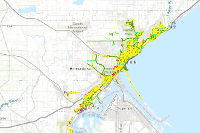

<Item title:"Duluth Trail Layers" type:Web Map owner:ksundeen_lsc>


In [6]:
from IPython.display import display
items = gis.content.search('Duluth Trails')
for item in items:
    display(item)
print(items[0])

### Let's search Esri sample data. Others have published other fun layers...

In [ ]:
from IPython.display import display
items = esriGis.content.search('')
for item in items:
    display(item)
print(items[0])

In [ ]:
# Example list of Duluth trail data
'''
 <Item title:"Tree Canopy by City in Minnesota" type:Web Map owner:vikalpa>, 
 <Item title:"Tettegouche, geology, Walk 4" type:Web Map owner:cladoceran>, 
 <Item title:"Trail Status" type:Web Map owner:seife170_UMN>, 
 <Item title:"Duluth Minnesota Waterfront Trails" type:Web Mapping Application owner:cjwalk593>, 
 <Item title:"Duluth Ski Trail Conditions" type:Native Application owner:rabel006_UMN>, 
 <Item title:"Report conditions of mountainbike trail in Duluth" type:Web Mapping Application owner:leex6110_UMN>, 
 <Item title:"Trail Status Duluth" type:Web Mapping Application owner:seife170_UMN>, 
 <Item title:"Ski Trail Conditions - Duluth" type:Web Map owner:rabel006_UMN>, 
 <Item title:"Duluth Cross Country Trail Conditions" type:Feature Layer Collection owner:rbergstr_UMN>, 
 <Item title:"Chester Creek profile" type:Web Mapping Application owner:kbcarlso>]
 '''

In [ ]:
map.add_layer(items[0])
map

In [ ]:
# Search for other content
# search_result = gis.content.search(query="title:Duluth Trails*", item_type="Feature Layer")
searchResult = gis.content.search(query="*", item_type="Web Layer")
searchResult


### Import CSV file of trail tweets

## Review the imported csv data using Pandas for my csv

In [7]:
# Read & checkout csv as a pandas dataframe
import pandas

#--> For other random tweets
# trailTweetsCsv = r'..\notebooks2\twitterposts\tweethistory_trail_510_since2018-05-03.csv'
# trailTweets_df = pandas.read_csv(trailTweetsCsv)
# trailTweets_df

#--> For duluth gardens
# gardenCsv = r'..data\duluthgardens.csv'
# gardenCsv_df = pandas.read_csv(gardenCsv)
# gardenCsv_df


#--> For my Valley Fair Tweets
valleyTweetsCsv = r'..\notebooks2\twitterposts\tweethistory_#ValleyFair_20180611.csv'
valleyTweetsCsv_df = pandas.read_csv(valleyTweetsCsv)
valleyTweetsCsv_df

,created_at,tweet_id,text,name,screen_name,language,lat,long
0,6/10/2018 22:04,1.005930e+18,Heading #home for the day at #ValleyFair. I think I got burnt. Ha ha,Kim Sundeen,KSundeen,en,45.249559,-93.024857
1,6/10/2018 21:40,1.005930e+18,#ValleyFair had a kick ass time today!!! #fairwell https://t.co/tO0xWW8SuK,Kim Sundeen,KSundeen,en,44.798738,-93.453917
2,6/10/2018 20:46,1.005910e+18,#ValleyFair #ThunderCanyon here we come!!! https://t.co/LMo4PWBbMR,Kim Sundeen,KSundeen,en,44.800471,-93.461790
3,6/10/2018 20:19,1.005910e+18,#ValleyFair #SteelVenom is totally the best so far!! https://t.co/26Rv39IMBb,Kim Sundeen,KSundeen,en,44.797843,-93.451812
4,6/10/2018 19:49,1.005900e+18,#ValleyFair I’m Batman!! I’d totally put on a bat suit and drive like #Batman. https://t.co/M1fpsXKFo9,Kim Sundeen,KSundeen,en,44.799605,-93.457564
5,6/10/2018 19:12,1.005890e+18,#ValleyFair #PowerTower it up!! https://t.co/bAyw8GrxVd,Kim Sundeen,KSundeen,en,44.799492,-93.456749
6,6/10/2018 18:48,1.005880e+18,#ValleyFair #WildThing....it’s a looooong way up!! https://t.co/KqA8pmn3HZ,Kim Sundeen,KSundeen,en,44.798558,-93.458715
7,6/10/2018 18:47,1.005880e+18,#ValleyFair #WildThing seems to be the only one with a super long line. It’ll be #WorthTheWait https://t.co/b50Epdn6Ug,Kim Sundeen,KSundeen,en,44.798766,-93.458326
8,6/10/2018 18:30,1.005880e+18,#ValleyFair #Excalibur was comfortable....not too crazy!! https://t.co/iyLk6tO4a8,Kim Sundeen,KSundeen,en,44.799441,-93.461949
9,6/10/2018 18:17,1.005880e+18,#ValleyFair #renegade craziness....this was way faster than I expected. https://t.co/XGCnrIWEtV,Kim Sundeen,KSundeen,en,44.800434,-93.460883


In [8]:
#--> How many records for this? 

# trailTweets_df.shape
# gardenCsv_df.shape
valleyTweetsCsv_df.shape


(19, 8)

<Item title:"Kim's Valley Fair Tweets" type:CSV owner:ksundeen_lsc>
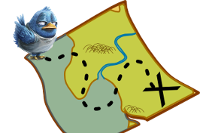

In [9]:
# Publish csv data to AGOL account
# https://developers.arcgis.com/python/sample-notebooks/publishing-sd-shapefiles-and-csv/

#--> Trail Tweets
# -----------------------
# csvFile = r'..\notebooks2\twitterposts\tweethistory_trail_510_since2018-05-03.csv'
# csvProperties={'title':'Trail tweets in the US',
#                 'description':'Tweets with spatial locations in last 2 weeks',
#                 'tags':'tweets, trails'}

# thumbnailPath = r"..\notebooks2\TrailTweets.png"
# -----------------------


#--> Valley Fair Tweets
# -----------------------
csvFile = r'..\notebooks2\twitterposts\tweethistory_#ValleyFair_20180611.csv'
csvProperties={'title':'Kim\'s Valley Fair Tweets',
                'description':'Tweets while hanging 10 on some roller coasters in MN',
                'tags':'tweets, roller coasters'}

thumbnailPath = r"..\notebooks2\TrailTweets.png"
# ----------------------

# Need to add item to AGOL first before publishing xy coords
csvItem = gis.content.add(item_properties=csvProperties, data=csvFile,
                                     thumbnail=thumbnailPath)
csvItem

### Convert CSV to json to upload as xy coordinates

<Item title:"Kim's Valley Fair Tweets" type:Feature Layer Collection owner:ksundeen_lsc>
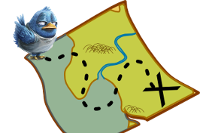

In [10]:
# Publish the csv file with coordinates. 
# CSV & Excel files (.xls, .xlsx) with location fields (e.g., address fields or x,y fields) 
# are spatially enabled during the process of publishing. 

csvPublishLyr = csvItem.publish()
csvPublishLyr

# If publishing addresses to be geocoded, set an Address field:
# addressCsvLyr = csvItem.publish({"Address": "MyFieldName"})

#### Update the AGOL Layer with a new thumbnail since this one's ugly

<Item title:"Super Awesome Valley Tweets" type:Feature Layer Collection owner:ksundeen_lsc>
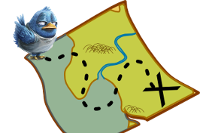

In [48]:
thumbnailPath = r"..\notebooks2\TrailTweets.png"
csvPublishLyr.update(item_properties={'title':'Super Awesome Valley Tweets'},
                  thumbnail=thumbnailPath)
csvPublishLyr

### Let's Add This to a New Map

In [11]:
tweetMap = gis.map('Minnesota', zoomlevel=7)
tweetMap.add_layer(csvPublishLyr)
tweetMap

### Get New Tweets and Merge them into Existing Service
 a fun future project???

In [ ]:
#https://developers.arcgis.com/python/sample-notebooks/overwriting-feature-layers/#Publish-the-cities-feature-layer-using-the-initial-dataset